In [1]:
import matplotlib.pyplot as plt
import numpy as np
from monte_carlo import HMCGaussUpdate, MetropolisUpdate, binwise_chi2, MC3Uniform, AcceptRejectSampler, Channels, MC3Hamilton

In [2]:
# A more complicated test function
k = 16
tf_b = 1/.2**2
def osc(x):
    return x**2*np.cos(k*np.pi*x/.2)**2*tf_b
def dosc(x):
    return (2*x*np.cos(k*np.pi*x/.2)**2 - x**2*k*np.pi/.2*2*np.cos(k*np.pi*x/.2)*np.sin(k*np.pi*x/.2))*tf_b
def bound(a, x, b):
    return (x>a)*(x<=b)
def fn(x):
    return bound(.2, x, .4)*osc(x-.2) + bound(.4, x, .6) + bound(.6, x, .8)*osc(.8-x)
osc_integral = 1/30 + ((1.59155e-2 * k**2 - 8.06288e-4)*np.sin(6.28319*k) + 5.06606e-3*k*np.cos(6.28319*k)) / k**3
fn_true_value = 2*osc_integral + .2

def dfn(x):
    return bound(.2, x, .4)*dosc(x-.2) - bound(.6, x, .8)*dosc(.8-x)
def dpot_dq(x):
    return - dfn(x) / fn(x)

pdf = lambda x: fn(x)/fn_true_value

In [3]:
# hamilton monte carlo
pot = lambda q: -np.log(fn(q))
hmcm = HMCGaussUpdate(1, pot, dpot_dq, np.ones(1), steps=10, step_size=.001)
hmcm.init_sampler(0.5)
metrop = MetropolisUpdate(1, fn, proposal=lambda _: np.random.rand())
metrop.init_sampler(0.5)

Generated 5000 samples.
Generated 10000 samples.
Generated 15000 samples.
Generated 20000 samples.


/home/mathis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Generated 25000 samples.
Generated 30000 samples.
Metrop acceptance rate: 0.2826, Hamilton acceptance rate: 0.9984
Metrop chi2: 4.5777, Hamiltonian chi2: 3.5466


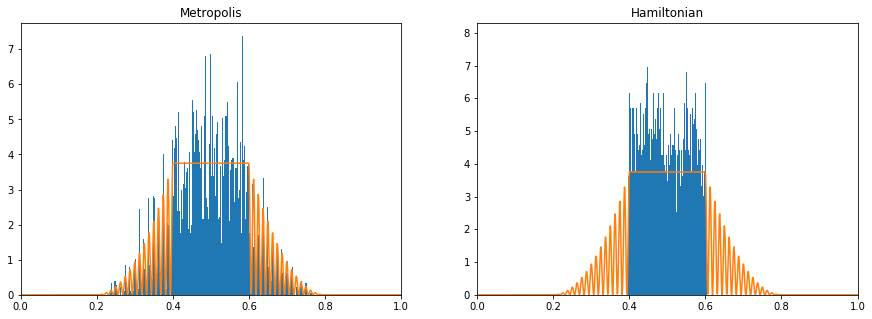

In [4]:
size = 30000
bins = 1000
met_q, met_r = metrop.sample(size, True, log=-1)
hmcm_q, hmcm_r = hmcm.sample(size, True, log=5000)
print("Metrop acceptance rate: %.4f, Hamilton acceptance rate: %.4f" % (met_r, hmcm_r))
met_chi = binwise_chi2(pdf, met_q, bins=bins)
hmcm_chi = binwise_chi2(pdf, hmcm_q, bins=bins)
print("Metrop chi2: %.4f, Hamiltonian chi2: %.4f" % (met_chi, hmcm_chi))


x = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Metropolis")
plt.hist(met_q, bins=bins, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0, 1)


plt.subplot(122)
plt.title("Hamiltonian")
plt.hist(hmcm_q, bins=bins, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0, 1)
plt.show()

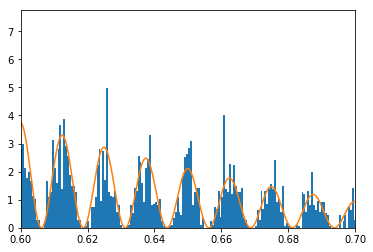

In [5]:
x = np.linspace(0.6, 0.7, 800)
plt.hist(met_q, bins=1000, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0.6, 0.7)
plt.show()

In [5]:
p3 = lambda x: (bound(.2,x,.4)*((x-.2)/.2)**2 + bound(.6,x,.8)*((.8-x)/.2)**2 + bound(.4,x,.6))/(.2 + .1333333)
sampling3 = AcceptRejectSampler(p3, 3.5).sample

In [7]:
mc3 = MC3Uniform(1, fn, Channels([sampling3], [p3]), delta=.01, beta=1)

mc3_q = mc3(([], [500]*40, []), 30000, initial=.5)

Generated 5000 samples.
Generated 10000 samples.
Generated 15000 samples.
Generated 20000 samples.
Generated 25000 samples.
Generated 30000 samples.


chi^2: 1.3128195988152318


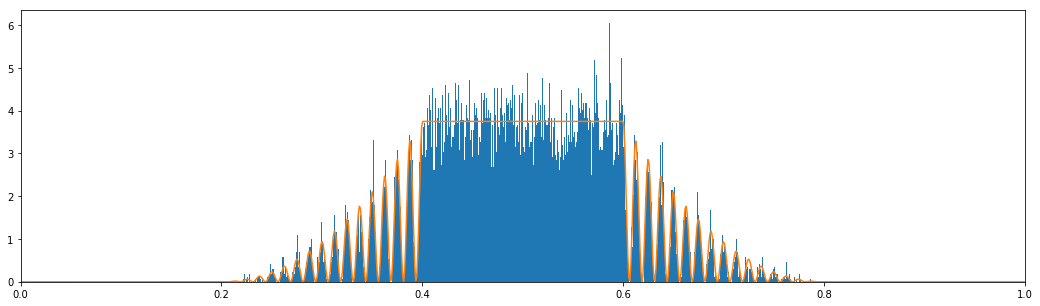

In [8]:
bins = 1000
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(18, 5))
plt.hist(mc3_q, bins=bins, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0, 1)
print("chi^2: " + str(binwise_chi2(pdf, mc3_q, bins=bins)))
plt.show()

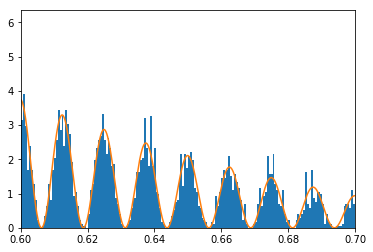

In [9]:
x = np.linspace(0.6, 0.7, 800)
plt.hist(mc3_q, bins=1000, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0.6, 0.7)
plt.show()

In [13]:
mc3h = MC3Hamilton(1, fn, Channels([sampling3], [p3]), dpot_dq, np.ones(1), step_size=.0005, steps=20)
mc3h.beta = .9
mc3h_q = mc3h(([], [500]*40, []), 30000)

print("chi^2: " + str(binwise_chi2(pdf, mc3h_q, bins=bins)))

Generated 5000 samples.
Generated 10000 samples.
Generated 15000 samples.
Generated 20000 samples.
Generated 25000 samples.
Generated 30000 samples.
chi^2: 1.273530548034932


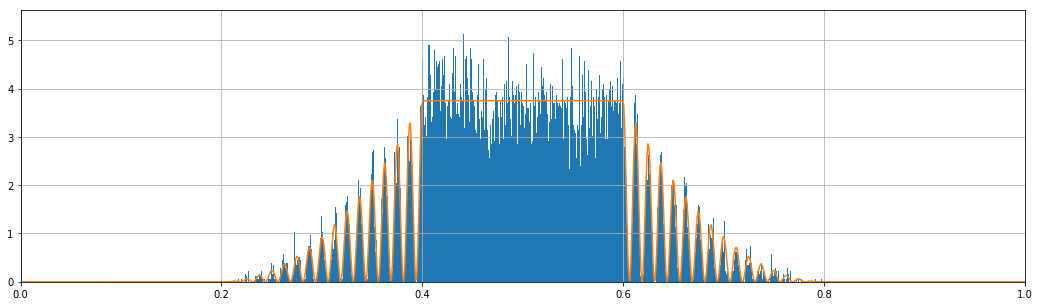

In [14]:
bins = 1000
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(18, 5))
plt.hist(mc3h_q, bins=bins, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0, 1)
plt.grid()
plt.show()

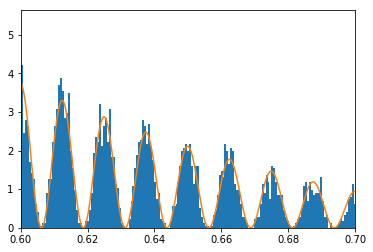

In [15]:
x = np.linspace(0.6, 0.7, 800)
plt.hist(mc3h_q, bins=1000, normed=True)
plt.plot(x, pdf(x))
plt.xlim(0.6, 0.7)
plt.show()